In [1]:
import pandas as pd

In [2]:
def parse(name, s):
    return pd.Series(map(int, s.split('\t')), name=name)

<AxesSubplot:>

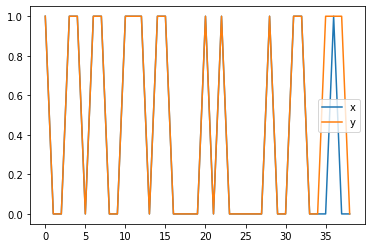

In [3]:
t1_x = parse('t1_x', "1	0	0	1	1	0	1	1	0	0	1	1	1	0	1	1	0	0	0	0	1	0	1	0	0	0	0	0	1	0	0	1	1	0	0	0	1	0	0")
t1_y = parse('t1_y', "1	0	0	1	1	0	1	1	0	0	1	1	1	0	1	1	0	0	0	0	1	0	1	0	0	0	0	0	1	0	0	1	1	0	0	1	1	1	0")
t1 = pd.DataFrame({"x": t1_x, "y": t1_y})
t1.plot()

<AxesSubplot:>

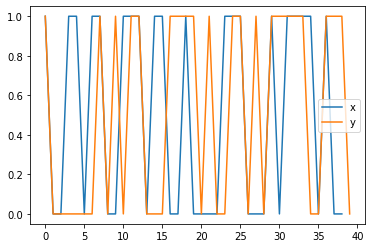

In [4]:
t2_x = parse('t2_x', "1	0	0	1	1	0	1	1	0	0	1	1	1	0	1	1	0	0	1	0	0	0	0	1	1	1	0	0	0	1	0	1	1	1	1	0	1	0	0")
t2_y = parse('t2_y', "1	0	0	0	0	0	0	1	0	1	0	1	1	0	0	0	1	1	1	1	0	1	0	0	1	1	0	1	0	1	1	1	1	1	0	0	1	1	1	0")
t2 = pd.DataFrame({"x": t2_x, "y": t2_y})
t2.plot()

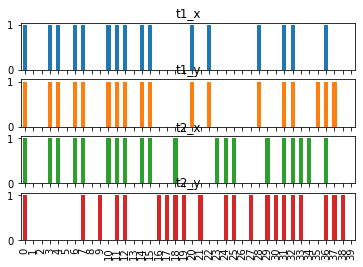

In [5]:
t = pd.DataFrame({"t1_x": t1_x, "t1_y": t1_y, 't2_x': t2_x, 't2_y': t2_y})
for plt in t.plot.bar(subplots=True):
    plt.legend().remove()

In [6]:
from ipycanvas import Canvas, hold_canvas, MultiCanvas

In [7]:
def draw_stitch(xs, ys, stitch_len=10, animate=False, canvas=None):
    if not canvas:
        canvas = Canvas(width=len(xs) * stitch_len, height=len(ys) * stitch_len)
        display(canvas)

    with hold_canvas():
        x = stitch_len
        for bit in xs:
            for y in range(0, len(ys), 2):
                y += 1 if not bit else 0
                canvas.stroke_line(x, y*stitch_len, x, (y+1)*stitch_len)
                if animate: canvas.sleep(1)
            x += stitch_len

        y = stitch_len
        for bit in ys:
            for x in range(0, len(xs), 2):
                x += 1 if not bit else 0
                canvas.stroke_line(x*stitch_len, y, (x+1)*stitch_len, y)
                if animate: canvas.sleep(1)
            y += stitch_len

In [8]:
draw_stitch(t1_x, t1_y)

Canvas(height=390, width=390)

In [9]:
draw_stitch(t2_x, t2_y)

Canvas(height=400, width=390)